# Práctica de Regresión con Machine Learning

Utilizamos el dataset de Cancer De Mama de Winconsi para realizar un modelo de regresión con Decision Tree y Support Vector Regressor.

[Kaggle](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('breast-cancer.csv')
print(df.head(2))

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890

In [6]:
#Eliminamos las variables: id, diagnosis
df.drop(columns=['id','diagnosis'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

<Axes: >

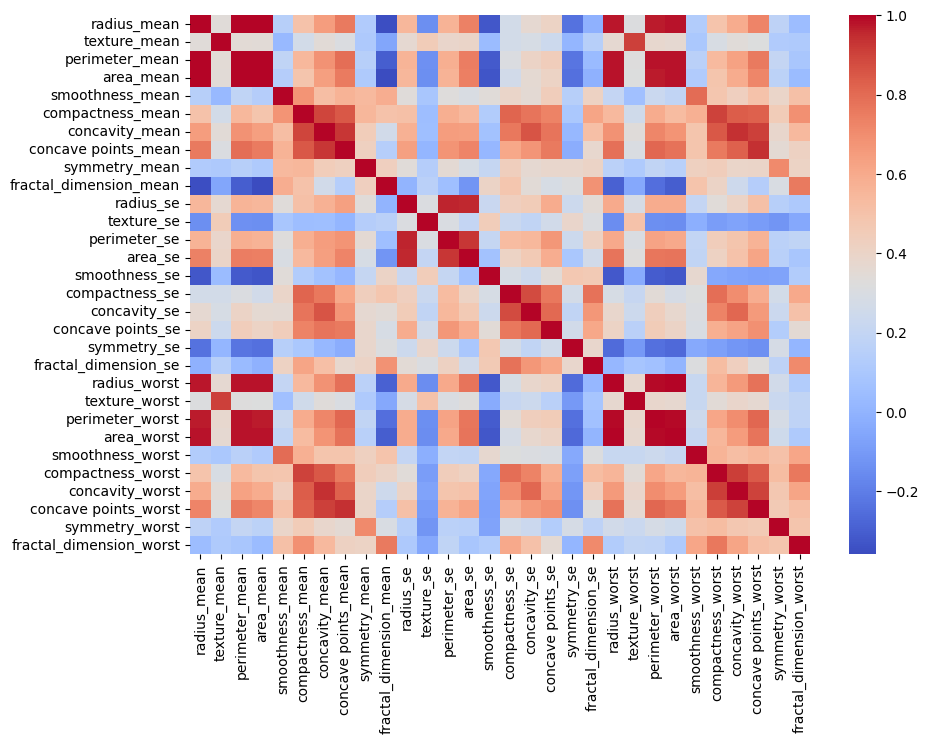

In [8]:
plt.figure(figsize=(10,7))

m_corr = df.corr(method='spearman')

sns.heatmap(m_corr, cmap='coolwarm') #cmap='hot','inferno'

In [9]:
#Creación del Dataset
y = df['radius_mean'].to_numpy() #esto es para convertir Serie de Pandas en array
X = df[['area_worst','perimeter_worst','smoothness_se','fractal_dimension_mean']].to_numpy()

## Support Vector Regressor

In [10]:
from sklearn.svm import SVR

In [11]:
#SMO sequential minimal optimization
svr1 = SVR(C=100).fit(X,y)
svr2 = SVR(C=0.1).fit(X,y)
svr3 = SVR(C=0.01).fit(X,y)

In [12]:
# Generar prediccion con cada modelo
ypred1 = svr1.predict(X)
ypred2 = svr2.predict(X)
ypred3 = svr3.predict(X)

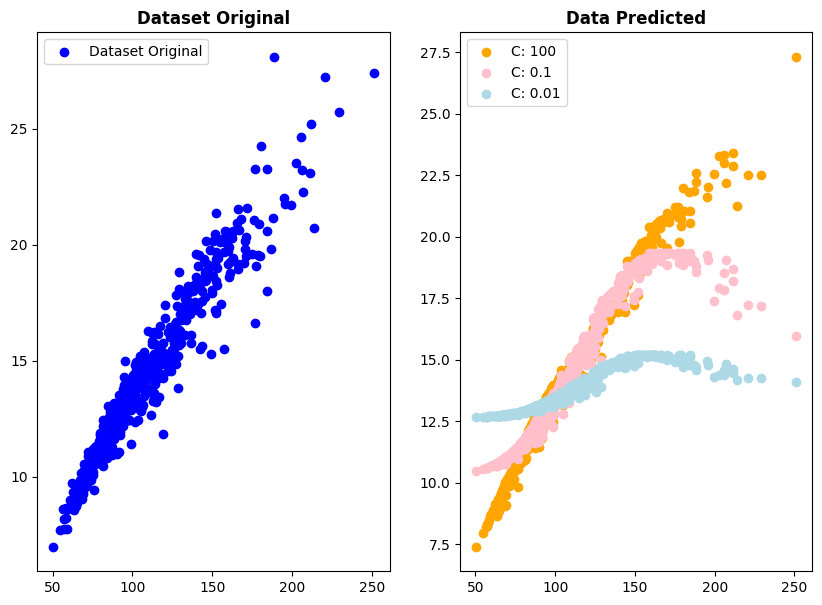

In [16]:
# Creamos una figura con 2 frames

fig, axs = plt.subplots(1,2,figsize=(10,7),dpi=100)

axs[0].scatter(X[:,1],y,c='blue',label='Dataset Original')
axs[0].set_title('Dataset Original',fontweight='bold')
axs[0].legend()

axs[1].scatter(X[:,1],ypred1,c='orange',label='C: 100')
axs[1].scatter(X[:,1],ypred2,c='pink',label='C: 0.1')
axs[1].scatter(X[:,1],ypred3,c='lightblue',label='C: 0.01')
axs[1].set_title('Data Predicted',fontweight='bold')
axs[1].legend()

plt.show()

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
dt1 = DecisionTreeRegressor(max_depth=3).fit(X,y)
dt2 = DecisionTreeRegressor(max_depth=10).fit(X,y)
dt3 = DecisionTreeRegressor().fit(X,y)

In [24]:
ypred1 = dt1.predict(X)
ypred2 = dt2.predict(X)
ypred3 = dt3.predict(X)

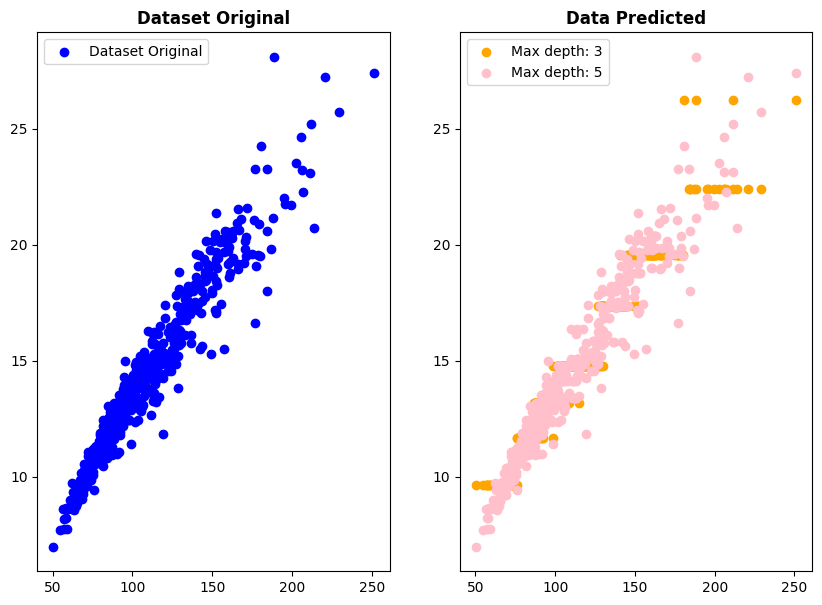

In [25]:
# Creamos una figura con 2 frames

fig, axs = plt.subplots(1,2,figsize=(10,7),dpi=100)

axs[0].scatter(X[:,1],y,c='blue',label='Dataset Original')
axs[0].set_title('Dataset Original',fontweight='bold')
axs[0].legend()

axs[1].scatter(X[:,1],ypred1,c='orange',label='Max depth: 3')
axs[1].scatter(X[:,1],ypred2,c='pink',label='Max depth: 5')
# axs[1].scatter(X[:,1],ypred3,c='lightblue',label='Max depth: forever')
axs[1].set_title('Data Predicted',fontweight='bold')
axs[1].legend()

plt.show()

In [ ]:
parameters = {'max_depth':[2,3,4,5,10],
              'min_leaf_feature':[5,10,15]}
GridSearchCV(dt,paremeters) -> Best Model: max_depth=4 , min_leaf_feature:10

In [26]:
from sklearn import metrics as ms

In [ ]:
r2 = ms.r2_score(y,ypred)
mse = ms.mean_squared_error(y,ypred_svm)
mae = ms.mean_absolute_error(y,ypred)